In [4]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dropout, Flatten, Dense

img_width, img_height = 150, 150

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))



train_data_dir = './data/dogscats/train'
validation_data_dir = './data/dogscats/valid'
nb_train_samples = 23000
nb_validation_samples = 2000
epochs = 50
batch_size = 16

In [6]:
# build a classifier model to put on top of the convolutional model
top_model = Sequential()
top_model.add(Flatten(input_shape=base_model.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(1, activation='sigmoid'))

In [7]:
model = Model(inputs=base_model.input, outputs=top_model(base_model.output))

In [8]:
for layer in model.layers[:15]:
    layer.trainable = False

In [9]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])


In [10]:

# prepare data augmentation configuration
train_datagen = ImageDataGenerator(
    rescale=1. / 255)
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

model.summary()


Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________

In [11]:
# fine-tune the model
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,
    verbose=2)

Epoch 1/50
 - 107s - loss: 0.2873 - acc: 0.8720 - val_loss: 0.1881 - val_acc: 0.9240
Epoch 2/50
 - 106s - loss: 0.1716 - acc: 0.9325 - val_loss: 0.1494 - val_acc: 0.9410
Epoch 3/50
 - 106s - loss: 0.1402 - acc: 0.9428 - val_loss: 0.1410 - val_acc: 0.9400
Epoch 4/50
 - 106s - loss: 0.1205 - acc: 0.9519 - val_loss: 0.1262 - val_acc: 0.9515
Epoch 5/50
 - 104s - loss: 0.1046 - acc: 0.9591 - val_loss: 0.1227 - val_acc: 0.9465
Epoch 6/50
 - 106s - loss: 0.0903 - acc: 0.9646 - val_loss: 0.1118 - val_acc: 0.9585
Epoch 7/50
 - 110s - loss: 0.0784 - acc: 0.9710 - val_loss: 0.1192 - val_acc: 0.9485
Epoch 8/50
 - 107s - loss: 0.0672 - acc: 0.9749 - val_loss: 0.1074 - val_acc: 0.9605
Epoch 9/50
 - 106s - loss: 0.0584 - acc: 0.9791 - val_loss: 0.1353 - val_acc: 0.9505
Epoch 10/50
 - 106s - loss: 0.0490 - acc: 0.9815 - val_loss: 0.1653 - val_acc: 0.9425
Epoch 11/50
 - 111s - loss: 0.0413 - acc: 0.9857 - val_loss: 0.1149 - val_acc: 0.9585
Epoch 12/50
 - 110s - loss: 0.0341 - acc: 0.9894 - val_loss: 0.

In [13]:
top_model.save('catdogtopmodel.h5')

In [14]:
x_sample, _ = next(validation_generator)

In [17]:
x_sample[0].shape

(150, 150, 3)

In [19]:
import matplotlib.pyplot as plt
plt.imshow(x_sample[0])

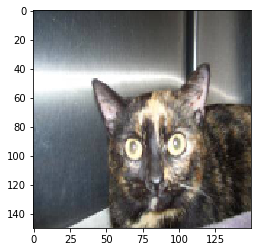

In [20]:
plt.show()

In [25]:
predictions = model.predict(x_sample)

In [28]:
for pred in predictions:
    print(int(pred))

0
0
0
1
0
0
1
0
1
0
0
0
0
0
0
0


In [29]:
_

array([ 0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,
        0.,  0.,  1.], dtype=float32)

In [30]:
plt.imshow(x_sample[3])

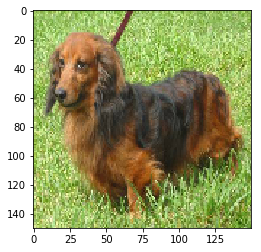

In [31]:
plt.show()

In [32]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [33]:
model.to_json()

'{"keras_version": "2.1.2", "backend": "tensorflow", "class_name": "Model", "config": {"output_layers": [["sequential_4", 1, 0]], "name": "model_1", "layers": [{"class_name": "InputLayer", "inbound_nodes": [], "name": "input_2", "config": {"sparse": false, "dtype": "float32", "batch_input_shape": [null, 150, 150, 3], "name": "input_2"}}, {"class_name": "Conv2D", "inbound_nodes": [[["input_2", 0, 0, {}]]], "name": "block1_conv1", "config": {"kernel_constraint": null, "bias_initializer": {"class_name": "Zeros", "config": {}}, "trainable": false, "padding": "same", "data_format": "channels_last", "dilation_rate": [1, 1], "kernel_regularizer": null, "activation": "relu", "kernel_size": [3, 3], "use_bias": true, "name": "block1_conv1", "bias_constraint": null, "filters": 64, "bias_regularizer": null, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"mode": "fan_avg", "scale": 1.0, "distribution": "uniform", "seed": null}}, "strides": [1, 1], "activity_regularizer": null}},

In [35]:
with open('./vgg_catdog_trained.json', "w") as json_file:
    json_file.write(model.to_json())

In [36]:
model.save_weights('vgg_catdog_model_weight.h5')

In [37]:
model.save('vgg_catdog_model_all.h5')